## CHURN PREDICTION MODEL

### NAME- AKANKSHA MANRO           CLASS-CSE(AI)-C        REG NO.- 11018210003

Predicting and preventing customer churn represents a huge additional potential revenue source for every business.

Customer churn (also known as customer attrition) refers to when a customer (player, subscriber, user, etc.) ceases his or her relationship with a company.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## IMPORTING DATASET

In [2]:
test=pd.read_csv(r'C:\Users\Akanksha manro\Desktop\SEM 5\machine learning\churn project\test (1).csv')
train=pd.read_csv(r'C:\Users\Akanksha manro\Desktop\SEM 5\machine learning\churn project\train (1).csv')


In [3]:
train.shape

(4250, 20)

In [4]:
test.shape

(750, 20)

In [5]:
# look at the first five rows
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
# what kind of data is each column?
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [7]:
#CHECKING IF THERE IS ANY NULL VALUES IN THE TRAIN DATASET
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#### THERE IS NO NULL DATA IN TRAIN DATASET.

In [8]:
#CHECKING IF THERE IS ANY NULL VALUES IN THE TEST DATASET
test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [9]:
train['state'].value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
OH     95
WY     95
WI     94
MA     89
ME     89
CT     88
MI     87
KS     87
RI     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
DE     80
MO     80
CO     80
MT     80
WA     80
NC     80
TN     79
IL     79
NH     78
OK     78
NM     78
HI     77
AZ     77
FL     76
SD     75
NE     73
SC     72
DC     72
AR     71
LA     69
ND     67
PA     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

In [10]:
train['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

THERE ARE 3854 ROWS WITH NO VALUE AND 396 ROWS WITH YES VALUE.

In [11]:
train['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [12]:
train['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

## Exploratory Data Analysis

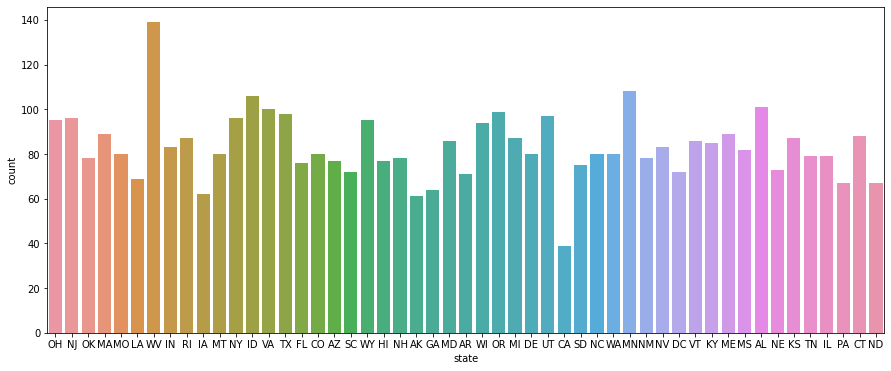

In [13]:
#plotting count plot of states column
plt.figure(figsize=(15,6))
sns.countplot(x ='state', data = train)
plt.show()

### THIS PLOT TELLS US LIKE HOW MANY CUSTOMERS ARE THERE IN EACH STATES.

Text(0.5, 1.0, 'Area Info')

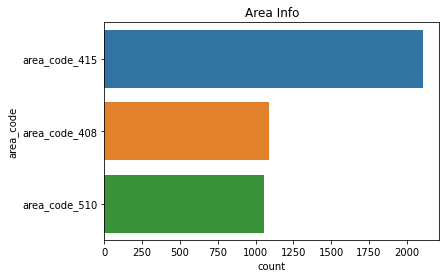

In [14]:
sns.countplot(y="area_code",data=train)
plt.title("Area Info")

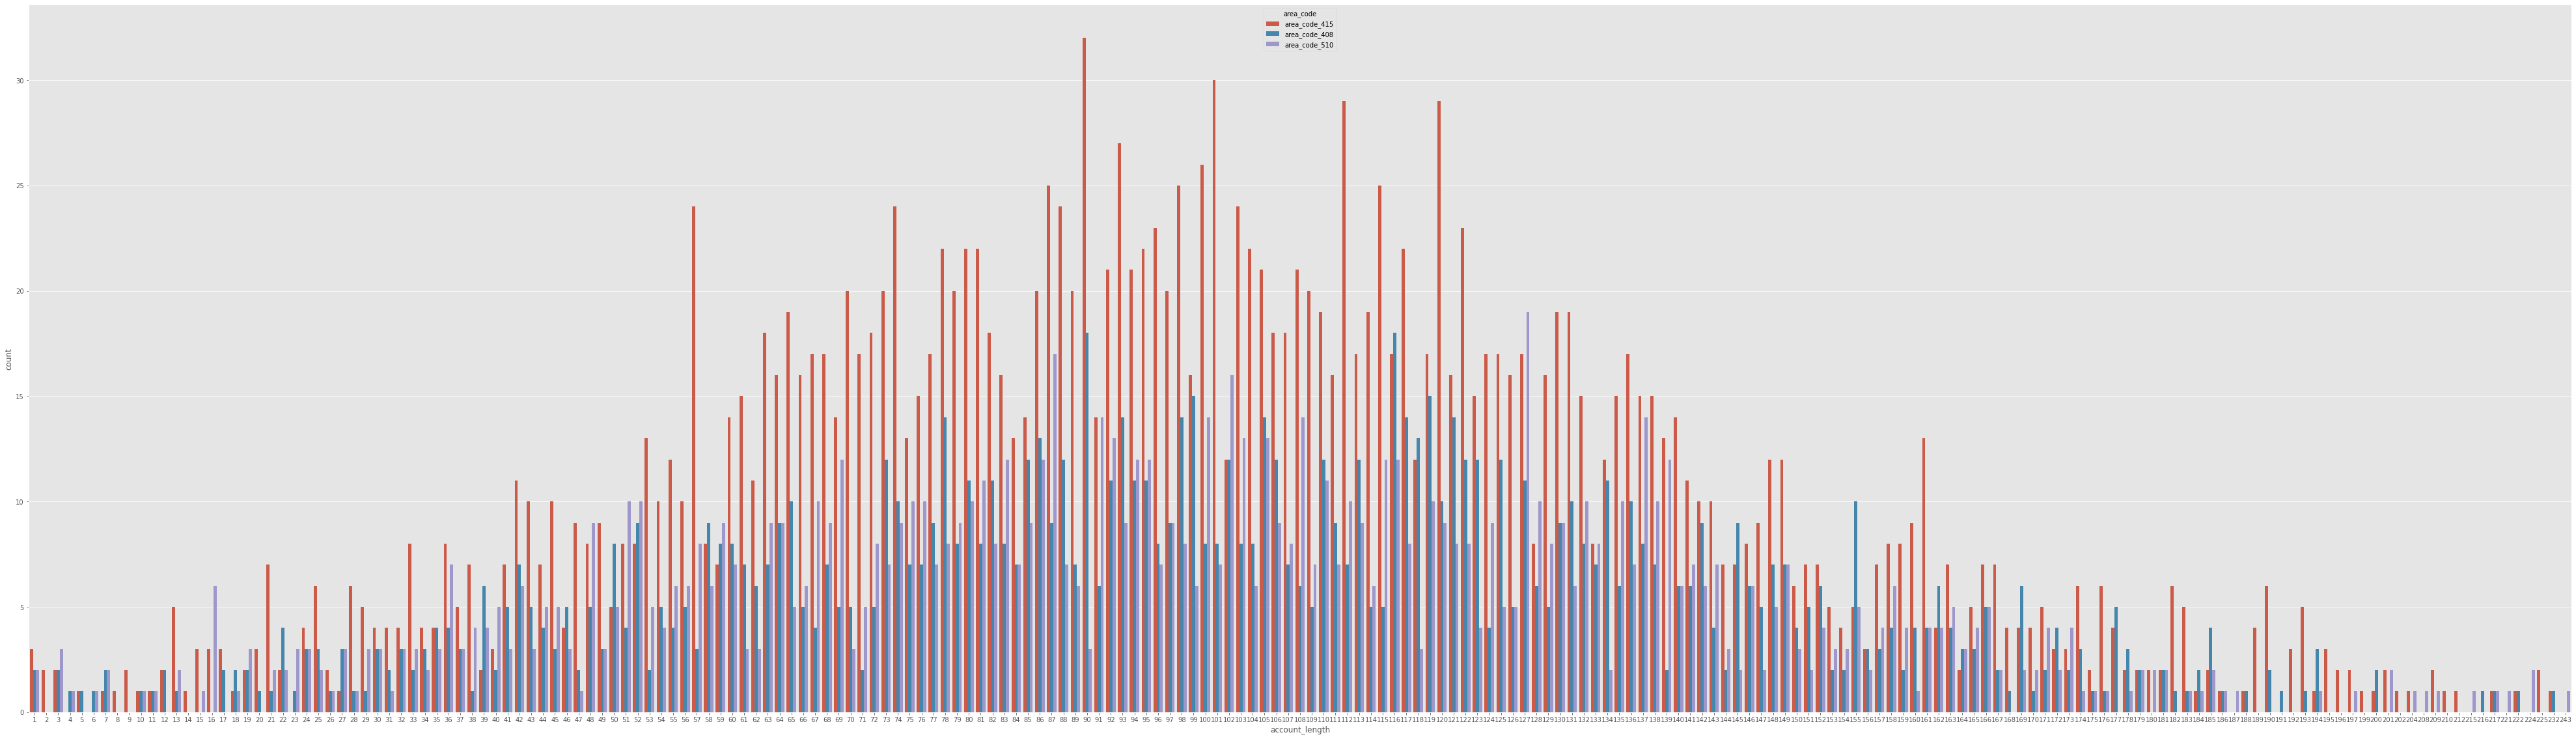

In [15]:
from matplotlib.pyplot import style
style.use(("ggplot"))

plt.figure(figsize=(70,20))
sns.countplot(x="account_length",hue="area_code",data=train)

plt.show()

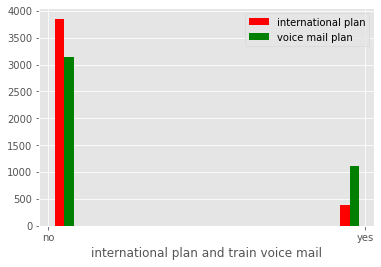

In [16]:
#PLOTTING HISTOGRAM
plt.hist([train.international_plan,train.voice_mail_plan],rwidth=0.6,color=["r","g"],label=["international plan","voice mail plan"])
plt.xlabel("international plan and train voice mail")
plt.legend()
plt.show()

#### THIS GRAPH SHOWS THAT HOW MANY CUSOMERS HAVE INTERNATIONAL PLAN and  TRAIN VOICE MAIL yes AND no.THERE IS APPROXIMATELY MORE THAN 3500 CUSTOMERS WHICH HAVE INTERNALTIONAL PLAN NO.

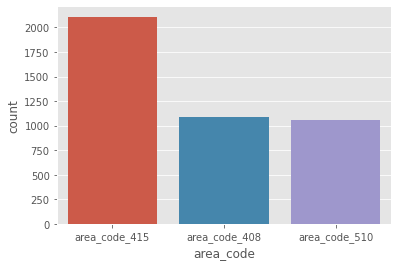

In [17]:
#plotting countplot using seaborn
sns.countplot(x ='area_code', data = train)
plt.show()

### THIS SHOWS THAT area code_415 HAS MORE THAN 2000 CUSTOMERS.

<AxesSubplot:>

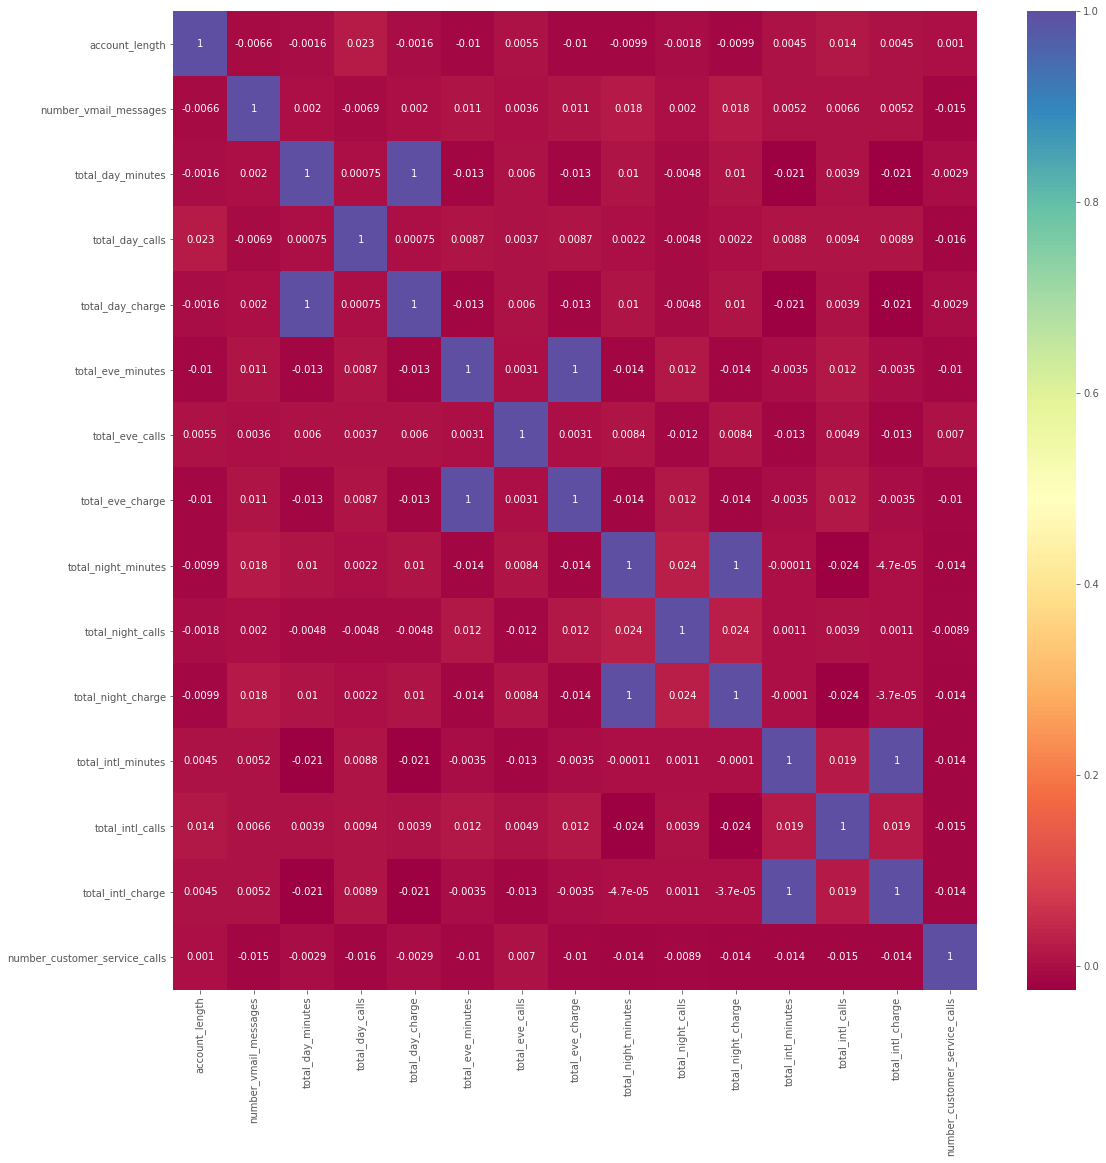

In [18]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot=True, cmap='Spectral')

## CONVERTING STRINGS INTO CATEGORICAL TYPE

In [19]:
#coverting states,area code,international plan,voice mail plan,churn in both train and test dataset 
train.state = pd.Categorical(train.state).codes
train.area_code = pd.Categorical(train.area_code).codes
train.international_plan = pd.Categorical(train.international_plan).codes
train.voice_mail_plan = train.voice_mail_plan.map({"yes":1,"no":0})
train.churn = pd.Categorical(train.churn).codes
test.state = pd.Categorical(test.state).codes
test.area_code = pd.Categorical(test.area_code).codes
test.voice_mail_plan = pd.Categorical(test.voice_mail_plan).codes
test.international_plan = pd.Categorical(test.international_plan).codes

In [20]:
train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [21]:
#checking 1 and 0 value in churn dataset
train['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

There Are 3652 zero and 598 one in churn column.

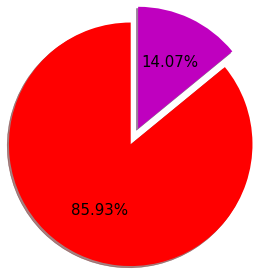

In [22]:
#plotting pie chart of churn column
plt.pie([3652,598],explode=[0.2,0],colors=["r","m"],autopct="%0.2f%%",shadow=True,radius=1.4,startangle=90,textprops={"fontsize":15})
plt.show()

In [23]:
# what kind of data is each column?
train.dtypes

state                               int8
account_length                     int64
area_code                           int8
international_plan                  int8
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               int8
dtype: object

## SPLITTING DATASET INTO TRAIN AND TEST DATASET

In [24]:
#splitting dataset into train and test dataset
from sklearn.model_selection import train_test_split
X = train.drop('churn',axis=1)
y  = train.churn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
#to know the shape of X_train dataset
X_train.shape

(3400, 19)

### THERE ARE 3400 ROWS AND 19 COLUMNS

In [26]:
y_train.shape

(3400,)

## FEATURE SCALING

In [27]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
s=pd.DataFrame(X_train_scaled)

In [29]:
s.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.164584,0.558760,-1.404290,-0.315050,1.681912,2.481827,-0.721519,1.344791,-0.721688,-0.961138,-0.213183,-0.961192,0.357043,0.727232,0.358723,-0.772936,-0.561550,-0.769691,1.113083
1,1.569554,1.333631,-1.404290,-0.315050,1.681912,2.035530,-2.133096,-1.203336,-2.133482,-0.322284,-0.466599,-0.321990,-0.962133,-1.247759,-0.963077,1.572349,-1.369877,1.569042,-0.420027
2,-1.737695,0.083839,0.007474,-0.315050,-0.594561,-0.567869,-0.115501,-0.154107,-0.115236,-0.511353,0.192284,-0.511643,-0.351621,2.955426,-0.352344,-0.339960,-0.157386,-0.342037,1.113083
3,-0.252808,0.633747,0.007474,-0.315050,-0.594561,-0.567869,0.235546,0.695268,0.235810,-2.483642,-1.987099,-2.483102,-0.282914,-1.349041,-0.282546,0.309503,-1.369877,0.312808,1.113083
4,-1.535211,1.358627,0.007474,3.174101,-0.594561,-0.567869,-0.078549,-0.603777,-0.078284,0.879797,-0.821383,0.879148,-0.210281,-0.032380,-0.208386,0.345585,-1.369877,0.339537,0.346528


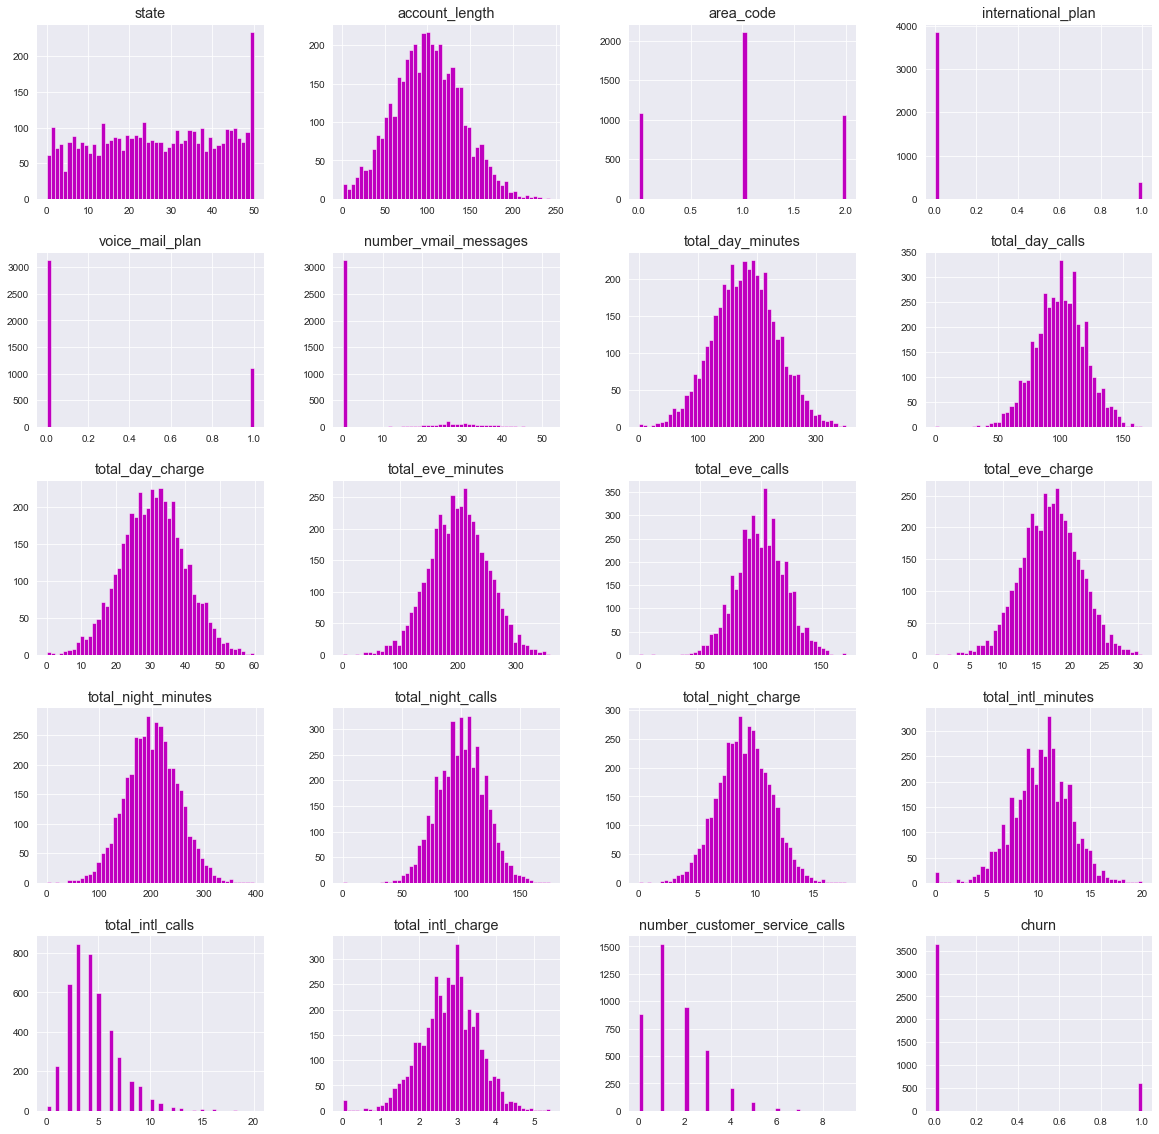

In [30]:
#plotting hist graph of all variables
sns.set_style('dark')
train.hist(bins=50,figsize=(20,20),color='m')
plt.show()

## Evaluating optimized model

### We will develop some predictive models and compare them. Some of the models: Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

In [31]:
# Running Random Forest model
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9352941176470588


<AxesSubplot:>

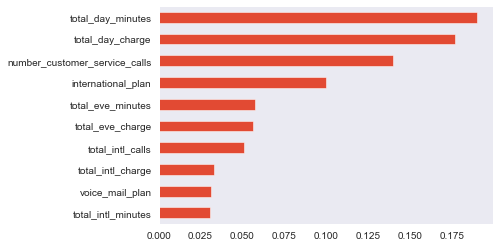

In [32]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [33]:
# Evaluate Optimized Model

# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8564705882352941


In [35]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8635294117647059

In [36]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[734   0]
 [116   0]]


In [37]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.888235294117647

## CONCLUSION

####  We did customer churn, Exploratory data analysis and visualization of employee churn dataset using matplotlib and seaborn, model building , evaluation using python scikit-learn package  and checking the accuracy using different models .
## ACCURACY OF MODELS
#### Random forest model- 93.52%
#### Logistic regression model- 85.64%
#### Support Vector Classifier- 86.35%
#### Ada Boost Classifier- 88.82%
## BEST MODEL TO USE -
#### We will go with random forest model as it gave the highest accuracy of 93.52% .